In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Rz(theta):
  
    return np.array([[  np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta),  np.cos(theta), 0 ],
                      [ 0            ,  0            , 1 ]])

# Apenas para visualização de um referencial no plano
def plot_frame(Porg, R, c=['r', 'g']):
    
    axis_size = 3.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
        
    # X
    plt.quiver(*Porg[:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

In [7]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient 
import math

client = RemoteAPIClient() 
sim = client.require('sim') 

sim.setStepping(True)

#Informações do pioneer
pioneer = sim.getObject('/PioneerP3DX')

pos = sim.getObjectPosition(pioneer, -1)   

ori = sim.getObjectOrientation(pioneer, -1)  

theta = ori[2]   
theta_deg = math.degrees(theta)
print("")
print("PioneerP3DX:")
print(f"Posição: x={pos[0]:.3f}, y={pos[1]:.3f}, z={pos[2]:.3f}")
print(f"Ângulo (rad): {theta:.3f}, Ângulo (graus): {theta_deg:.2f}")


#Informações da cadeira
chair = sim.getObject('/diningChair')

pos_ch = sim.getObjectPosition(chair, -1)   

ori_ch = sim.getObjectOrientation(chair, -1)  

theta_ch = ori[2]   # radianos
theta_deg_ch = math.degrees(theta)
print("")
print("diningChair:")
print(f"Posição: x={pos_ch[0]:.3f}, y={pos_ch[1]:.3f}, z={pos_ch[2]:.3f}")
print(f"Ângulo (rad): {theta_ch:.3f}, Ângulo (graus): {theta_deg_ch:.2f}")


#Informações da mesa
table = sim.getObject('/customizableTable')

pos_t = sim.getObjectPosition(table, -1)   

ori_t = sim.getObjectOrientation(table, -1)  

theta_t = ori_t[2]   
theta_deg_t = math.degrees(theta_t)

print("")
print("customizableTable:")
print(f"Posição: x={pos_t[0]:.3f}, y={pos_t[1]:.3f}, z={pos_t[2]:.3f}")
print(f"Ângulo (rad): {theta_t:.3f}, Ângulo (graus): {theta_deg_t:.2f}")


#Informações da planta
plant = sim.getObject('/indoorPlant')

pos_p = sim.getObjectPosition(plant, -1)   

ori_p = sim.getObjectOrientation(plant, -1)  

theta_p = ori_p[2]   
theta_deg_p = math.degrees(theta_p)

print("")
print("indoorPlant:")
print(f"Posição: x={pos_p[0]:.3f}, y={pos_p[1]:.3f}, z={pos_p[2]:.3f}")
print(f"Ângulo (rad): {theta_p:.3f}, Ângulo (graus): {theta_deg_p:.2f}")


#Informações do Bill
man = sim.getObject('/Bill')

pos_m = sim.getObjectPosition(man, -1)   

ori_m = sim.getObjectOrientation(man, -1)  

theta_m = ori_m[2]   
theta_deg_m = math.degrees(theta_m)

print("")
print("Bill:")
print(f"Posição: x={pos_m[0]:.3f}, y={pos_m[1]:.3f}, z={pos_m[2]:.3f}")
print(f"Ângulo (rad): {theta_m:.3f}, Ângulo (graus): {theta_deg_m:.2f}")


#Informações da janela
window = sim.getObject('/window140cm')

pos_w = sim.getObjectPosition(window, -1)   

ori_w = sim.getObjectOrientation(window, -1)  

theta_w = ori_w[2]   
theta_deg_w = math.degrees(theta_w)

print("")
print("window140cm:")
print(f"Posição: x={pos_w[0]:.3f}, y={pos_w[1]:.3f}, z={pos_w[2]:.3f}")
print(f"Ângulo (rad): {theta_w:.3f}, Ângulo (graus): {theta_deg_w:.2f}")


#Informações do piso (universal)
floor = sim.getObject('/Floor')

pos_f = sim.getObjectPosition(floor, -1)   

ori_f = sim.getObjectOrientation(floor, -1)  

theta_f = ori_f[2]   # radianos
theta_deg_f = math.degrees(theta_f)

print("")
print("Universo:")
print(f"Posição: x={pos_f[0]:.3f}, y={pos_f[1]:.3f}, z={pos_f[2]:.3f}")
print(f"Ângulo (rad): {theta_f:.3f}, Ângulo (graus): {theta_deg_f:.2f}")



PioneerP3DX:
Posição: x=0.000, y=0.000, z=0.100
Ângulo (rad): -0.227, Ângulo (graus): -13.00

diningChair:
Posição: x=-1.400, y=-1.500, z=0.450
Ângulo (rad): -0.227, Ângulo (graus): -13.00

customizableTable:
Posição: x=1.300, y=-1.500, z=0.700
Ângulo (rad): -0.000, Ângulo (graus): -0.00

indoorPlant:
Posição: x=1.500, y=1.175, z=0.165
Ângulo (rad): -1.571, Ângulo (graus): -90.00

Bill:
Posição: x=-1.825, y=1.450, z=0.000
Ângulo (rad): -0.000, Ângulo (graus): -0.00

window140cm:
Posição: x=2.170, y=0.000, z=1.200
Ângulo (rad): -0.000, Ângulo (graus): -0.00

Universo:
Posição: x=0.000, y=0.000, z=-0.100
Ângulo (rad): -0.000, Ângulo (graus): -0.00


In [8]:
#calcular a matriz de transformação do robô com relação ao universo
Rur = Rz(theta)
Tur = np.column_stack((Rur, pos))
aux = np.array([0, 0, 0, 1])
Tur = np.row_stack((Tur, aux))
print(Tur)

#calcular a matriz de transformação do universo com relaçao ao robô (inversa)
Rru = Rur.T
pr_uorg = -Rru @ pos

Tru = np.column_stack((Rru, pr_uorg))
Tru = np.row_stack((Tru, aux))
print(Tru)

#calcular a matriz de transformação da cadeira com relação ao universo

Ruc = Rz(theta_ch)
Tuc = np.column_stack((Ruc, pos_ch))
Tuc = np.row_stack((Tuc, aux))
print(Tuc)

#calcular a matriz de transformação da mesa com relação ao universo
Rum = Rz(theta_t)
Tum = np.column_stack((Rum, pos_t))
Tum = np.row_stack((Tum, aux))
print(Tum)


#calcular a matriz de transformação da planta com relação ao universo

Ruv = Rz(theta_p)
Tuv = np.column_stack((Ruv, pos_p))
Tuv = np.row_stack((Tuv, aux))
print(Tuv)

#calcular a matriz de transformação do bill com relação ao universo
Rup = Rz(theta_m)
Tup = np.column_stack((Rup, pos_m))
Tup = np.row_stack((Tup, aux))
print(Tup)

#calcular a matriz de transformação da janela com relação ao universo
Ruw = Rz(theta_w)
Tuw = np.column_stack((Ruw, pos_w))
Tuw = np.row_stack((Tuw, aux))
print(Tuw)


[[ 0.97437006  0.22495105  0.          0.        ]
 [-0.22495105  0.97437006  0.          0.        ]
 [ 0.          0.          1.          0.1       ]
 [ 0.          0.          0.          1.        ]]
[[ 0.97437006 -0.22495105  0.          0.        ]
 [ 0.22495105  0.97437006  0.          0.        ]
 [ 0.          0.          1.         -0.1       ]
 [ 0.          0.          0.          1.        ]]
[[ 0.97437006  0.22495105  0.         -1.4       ]
 [-0.22495105  0.97437006  0.         -1.49999937]
 [ 0.          0.          1.          0.45000038]
 [ 0.          0.          0.          1.        ]]
[[ 1.   0.   0.   1.3]
 [-0.   1.   0.  -1.5]
 [ 0.   0.   1.   0.7]
 [ 0.   0.   0.   1. ]]
[[-1.60812265e-16  1.00000000e+00  0.00000000e+00  1.50000012e+00]
 [-1.00000000e+00 -1.60812265e-16  0.00000000e+00  1.17499994e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.65000111e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.     0.     0.    

/tmp/ipykernel_25905/2946365979.py:5: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  Tur = np.row_stack((Tur, aux))
/tmp/ipykernel_25905/2946365979.py:13: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  Tru = np.row_stack((Tru, aux))
/tmp/ipykernel_25905/2946365979.py:20: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  Tuc = np.row_stack((Tuc, aux))
/tmp/ipykernel_25905/2946365979.py:26: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  Tum = np.row_stack((Tum, aux))
/tmp/ipykernel_25905/2946365979.py:34: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  Tuv = np.row_stack((Tuv, aux))
/tmp/ipykernel_25905/2946365979.py:40: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  Tup = np.row_stack((Tup, aux))
/tmp/ipykernel_25905/2946365979.py:46: DeprecationWarning: `row_stack` alias is deprecated. Use

In [9]:
#calcular a matriz de transformação de cada elemento com relação ao robo (tre = tru @ tue)
Trc = Tru @ Tuc #a matriz de transformação da cadeira com relação ao robo
print(Trc)
Trm = Tru @ Tum #a matriz de transformação da mesa com relação ao robo
print(Trm)
Trv = Tru @ Tuv #a matriz de transformação da planta com relação ao robo
print(Trv)
Trp = Tru @ Tup #a matriz de transformação do bill com relação ao robo
print(Trp)
Trw = Tru @ Tuw #a matriz de transformação da janela com relação ao robo
print(Trp)

[[ 1.00000000e+00 -4.88400385e-18  0.00000000e+00 -1.02669165e+00]
 [-4.88400385e-18  1.00000000e+00  0.00000000e+00 -1.77648596e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  3.50000376e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.97437006 -0.22495105  0.          1.60410767]
 [ 0.22495105  0.97437006  0.         -1.16911873]
 [ 0.          0.          1.          0.6       ]
 [ 0.          0.          0.          1.        ]]
[[ 0.22495105  0.97437006  0.          1.19723774]
 [-0.97437006  0.22495105  0.          1.48231138]
 [ 0.          0.          1.          0.06500011]
 [ 0.          0.          0.          1.        ]]
[[ 0.97437006 -0.22495105  0.         -2.1044044 ]
 [ 0.22495105  0.97437006  0.          1.00230092]
 [ 0.          0.          1.         -0.1       ]
 [ 0.          0.          0.          1.        ]]
[[ 0.97437006 -0.22495105  0.         -2.1044044 ]
 [ 0.22495105  0.97437006  0.          1.00230092]
 [ 0.         

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


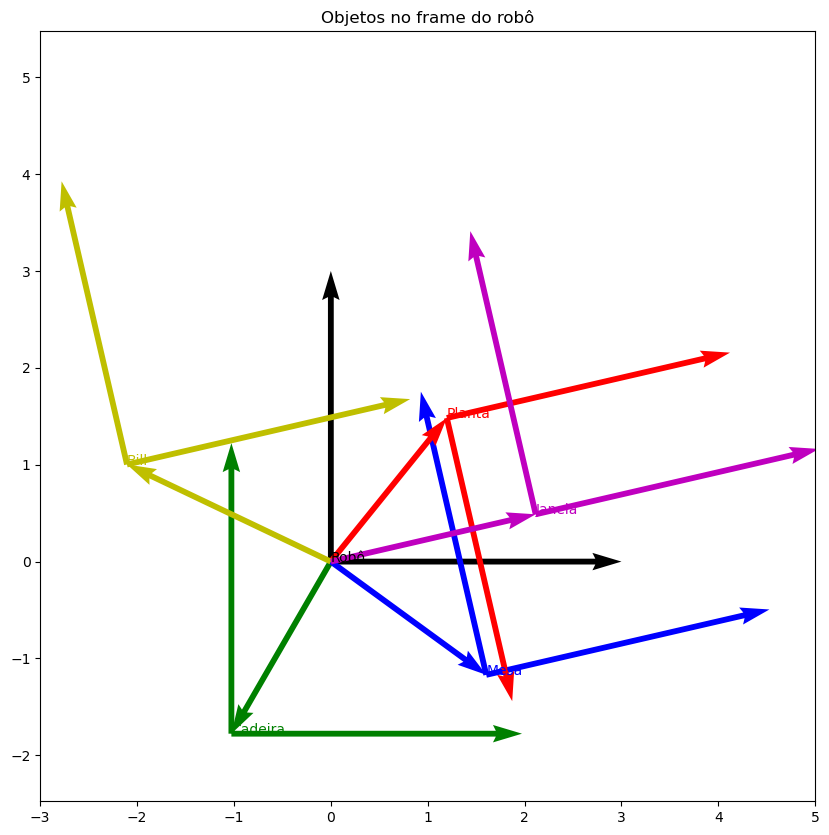

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Origem do universo 
aorg = np.array([0, 0])

plt.figure(figsize=(10,10))
plt.title("Objetos no frame do robô")
plt.axis('equal')

# ---- Robô 
plot_frame(np.array([0,0,0]), np.eye(3), ['k','k'])
plt.text(0, 0, "Robô", color='k')

# ---- Cadeira 
pr_corg = Trc[:3,3]       # posição da cadeira
Rrc = Trc[:3,:3]          # rotação da cadeira 
plot_frame(pr_corg, Rrc, ['g','g'])
plt.quiver(*aorg, *pr_corg[:2], color='g', angles='xy', scale_units='xy', scale=1)
plt.text(pr_corg[0], pr_corg[1], "Cadeira", color='g')

# ---- Mesa
pr_morg = Trm[:3,3]
Rrm = Trm[:3,:3]
plot_frame(pr_morg, Rrm, ['b','b'])
plt.quiver(*aorg, *pr_morg[:2], color='b', angles='xy', scale_units='xy', scale=1)
plt.text(pr_morg[0], pr_morg[1], "Mesa", color='b')

# ---- Planta
pr_vorg = Trv[:3,3]
Rrv = Trv[:3,:3]
plot_frame(pr_vorg, Rrv, ['r','r'])
plt.quiver(*aorg, *pr_vorg[:2], color='r', angles='xy', scale_units='xy', scale=1)
plt.text(pr_vorg[0], pr_vorg[1], "Planta", color='r')

# ---- Bill
pr_porg = Trp[:3,3]
Rrp = Trp[:3,:3]
plot_frame(pr_porg, Rrp, ['y','y'])
plt.quiver(*aorg, *pr_porg[:2], color='y', angles='xy', scale_units='xy', scale=1)
plt.text(pr_porg[0], pr_porg[1], "Bill", color='y')

# ---- Janela
pr_worg = Trw[:3,3]
Rrw = Trw[:3,:3]
plot_frame(pr_worg, Rrw, ['m','m'])
plt.quiver(*aorg, *pr_worg[:2], color='m', angles='xy', scale_units='xy', scale=1)
plt.text(pr_worg[0], pr_worg[1], "Janela", color='m')


plt.axis((-3, 5, -3, 6))
plt.show()
